In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split
import matplotlib

In [8]:
df = pd.read_csv("student_lifestyle_smote.csv")
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


In [9]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 100.00%


In [14]:
joblib.dump(model, 'students-rf-model.joblib')
print("Model saved as 'students-rf-model.joblib'")


Model saved as 'students-rf-model.joblib'


In [15]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


In [16]:
#test model joblib
loaded_model = joblib.load('students-rf-model.joblib')

#test prediction
sample_data = [[8.1,	0.6,	6.5,	2.2,	6.6,	3.51	]]
prediction = loaded_model.predict(sample_data)

print(f"Prediction: {prediction[0]}")
print("✅ Model loaded and working correctly!")


Prediction: 2
✅ Model loaded and working correctly!


c:\Users\M S I\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
#test model joblib
loaded_model = joblib.load('students-rf-model.joblib')

#test prediction
sample_data = [[5.3,	3.5,	8.0,	4.2,	3.0,	2.75		]]
prediction = loaded_model.predict(sample_data)

print(f"Prediction: {prediction[0]}")
print("✅ Model loaded and working correctly!")


Prediction: 0
✅ Model loaded and working correctly!


c:\Users\M S I\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


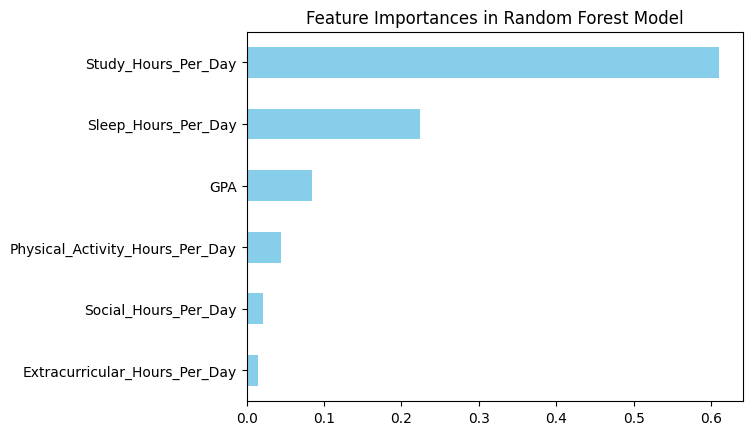

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Fitur_important = pd.Series(model.feature_importances_, index=X.columns)
Fitur_important.sort_values().plot(kind='barh', color='skyblue', title='Feature Importances in Random Forest Model')
plt.show()

#### Mencoba teteap test menggunakan model pickle

In [19]:
import pickle

In [20]:
#test model
with open('model.pkl', 'rb') as file:
        model = pickle.load(file)

#test prediction
sample_data = [[2, 2, 8, 3, 4]]
prediction = model.predict(sample_data)

print(f"Prediction: {prediction[0]}")
print("✅ Model loaded and working correctly!")

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'